# Ramen Ratings Data Analysis Project
#### By Brandon Stibich
#### Juptyr Notebook and Python 3.11.3

This dataset is sourced from a website and is representative of user ratings of various instant ramen products. After finding the data set on Kaggle, I'll begin by getting a better sense of the data itself by investigating the shape, columns, and interesting aspects and qualities.

https://www.kaggle.com/datasets/residentmario/ramen-ratings

In [53]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv('ramen-ratings.csv')

print(df.info())
df.Style.unique()
#df.Brand.unique()
#df.Country.unique()

df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2580 entries, 0 to 2579
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Review #  2580 non-null   int64 
 1   Brand     2580 non-null   object
 2   Variety   2580 non-null   object
 3   Style     2578 non-null   object
 4   Country   2580 non-null   object
 5   Stars     2580 non-null   object
 6   Top Ten   41 non-null     object
dtypes: int64(1), object(6)
memory usage: 141.2+ KB
None


,Review #,Brand,Variety,Style,Country,Stars,Top Ten
0,2580,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75,NaN
1,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1,NaN
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25,NaN
3,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75,NaN
4,2576,Ching's Secret,Singapore Curry,Pack,India,3.75,NaN


I first note that it's a rather long data set at 2580 rows yet only 7 columns. Nothing wrong with that, but certainly worth keeping in mind.

There are some interesting columns I'd like to investigate further here including Brand, Variety, Country, and Stars. First thoughts are I'd like to know what attribute contributes most to a higher star rating. 

Initial questions:
        
        What Countries produce the most instant ramen?

        What Style is most popular and where?

        Is there one Brand that has an especially strong showing in the top 10?    

        What Brands Average the highest stars?
I'll begin with some of the more simplistic questions to answer.

## What Countries produce the most instant ramen?

In [54]:
#Lets numerically see who makes the most
df.Country.value_counts()  

Japan            352
USA              323
South Korea      309
Taiwan           224
Thailand         191
China            169
Malaysia         156
Hong Kong        137
Indonesia        126
Singapore        109
Vietnam          108
UK                69
Philippines       47
Canada            41
India             31
Germany           27
Mexico            25
Australia         22
Netherlands       15
Myanmar           14
Nepal             14
Pakistan           9
Hungary            9
Bangladesh         7
Colombia           6
Brazil             5
Cambodia           5
Fiji               4
Holland            4
Poland             4
Finland            3
Sarawak            3
Sweden             3
Dubai              3
Ghana              2
Estonia            2
Nigeria            1
United States      1
Name: Country, dtype: int64

Top Countries in order are Japan, USA, South Korea, Taiwan, Thailand, and China.

Now let's visuaize that!


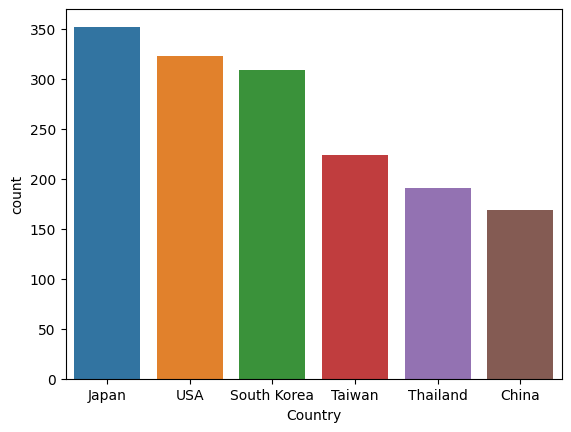

In [55]:
#Seperate the top countries into their own dataframes for easy concatenation
df_japan = df.loc[df['Country'] == 'Japan']
df_usa = df.loc[df['Country'] == 'USA']
df_sk = df.loc[df['Country'] == 'South Korea']
df_taiw = df.loc[df['Country'] == 'Taiwan']
df_thai = df.loc[df['Country'] == 'Thailand']
df_china = df.loc[df['Country'] == 'China']

#Use pd.concat function to combine all the top countries into a new dataframe
df_top_countries = pd.concat([df_japan, df_usa, df_sk, df_taiw, df_thai, df_china])
df_top_countries.head()
df_top_countries.Country.unique()

#Countplot would be ideal for showing which country has the most
countplot = sns.countplot(x='Country', data=df_top_countries)




As shown here the top 3 ramen producing countries are Japan, USA, and South Korea in that order.


# What Style of Instant Ramen is most popular?

Methodology of answering this question will be very similar to the question of which country produces the most, just with packaging style data rather than country of origin.

In [56]:
#Lets numerically see who makes the most
df.Style.value_counts()  

Pack    1531
Bowl     481
Cup      450
Tray     108
Box        6
Can        1
Bar        1
Name: Style, dtype: int64

Top Style of packaging is Pack by a very large margin, followed by Bowl then Cup.

Lets make a chart!

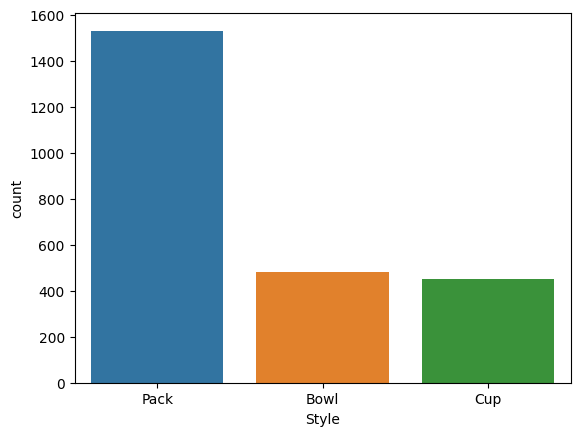

In [57]:
#Seperate the top countries into their own dataframes for easy concatenation
df_pack = df.loc[df['Style'] == 'Pack']
df_bowl = df.loc[df['Style'] == 'Bowl']
df_cup = df.loc[df['Style'] == 'Cup']

#Use pd.concat function to combine all the top countries into a new dataframe
df_top_styles = pd.concat([df_pack, df_bowl, df_cup])
df_top_styles.head()
df_top_styles.Style.unique()

#Countplot would be ideal for showing which country has the most
countplot = sns.countplot(x='Style', data=df_top_styles)






Now it is much more visually represented that Pack style instanst ramen has over 3 times the amount of product than Bowl or Cup.

# Is there one brand that has an especially strong showing in the top 10?

Because the top 10 presumably only has 10 items, I won't overcomplicate the analysis with excessive code. A good look through and some counts will suffice.

In [58]:
#First have to figure out what the options are for Top ten to figure out if its a string or a boolean or how they have it categorized
#print(df.TopTen)

#upon trying that it seems that they made the 'Top Ten' column name with a space so I'm going to have to fix that first
df = df.rename(columns={'Top Ten': 'Top_Ten'})

#print(df.Top_Ten)
#That's better. Personally I would have the column names be lowercase, however I don't think its worth the effort to rename them all for stylistic reasons alone.

print(df.Top_Ten.unique())


[nan '2016 #10' '2016 #1' '2016 #8' '2016 #5' '2016 #9' '2016 #7'
 '2015 #10' '2015 #7' '2015 #4' '2015 #9' '2015 #6' '2015 #1' '2013 #10'
 '2015 #8' '2014 #7' '2014 #4' '2014 #9' '2014 #10' '2014 #8' '2014 #5'
 '2014 #6' '2014 #1' '2013 #1' '2013 #2' '2013 #4' '\n' '2013 #9'
 '2013 #3' '2012 #10' '2012 #7' '2012 #5' '2012 #3' '2012 #6' '2012 #9'
 '2012 #1' '2012 #2' '2013 #6' '2012 #4']


My assumption was incorect. There seems to have been a yearly top 10, so each entry has a year and placement. I'll start by dividing that up into more atomic columns.

In [59]:
df[['Top_Ten_Year', 'Top_Ten_Place']] = df['Top_Ten'].str.split(' #', 1, expand=True)

print(df.Top_Ten_Year.unique()) #I see that '\n' managed to sneak into some, gonna have to drop those
print(df.Top_Ten_Place.unique())

df.head()

df = df[df.Top_Ten_Year != '\n']

print(df.Top_Ten_Year.unique()) 
print(df.Top_Ten_Place.unique())
#Thats better!

[nan '2016' '2015' '2013' '2014' '\n' '2012']
[nan '10' '1' '8' '5' '9' '7' '4' '6' '2' None '3']
[nan '2016' '2015' '2013' '2014' '2012']
[nan '10' '1' '8' '5' '9' '7' '4' '6' '2' '3']


C:\Users\Brandon\AppData\Local\Temp\ipykernel_12532\1596538639.py:1: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  df[['Top_Ten_Year', 'Top_Ten_Place']] = df['Top_Ten'].str.split(' #', 1, expand=True)


Now that we have the data set up a bit more cleanly, lets see if we can find which brands have the most top ten placements thoughout the years.

Lets make a new column indicated if the ramen has placed or not.

In [60]:
df['Placed'] =  pd.notna(df['Top_Ten_Year'])

print(df.Placed.unique())
df.head()

[False  True]


,Review #,Brand,Variety,Style,Country,Stars,Top_Ten,Top_Ten_Year,Top_Ten_Place,Placed
0,2580,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75,NaN,NaN,NaN,False
1,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1,NaN,NaN,NaN,False
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25,NaN,NaN,NaN,False
3,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75,NaN,NaN,NaN,False
4,2576,Ching's Secret,Singapore Curry,Pack,India,3.75,NaN,NaN,NaN,False


[Text(0, 0, '5'),
 Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0, '3')]

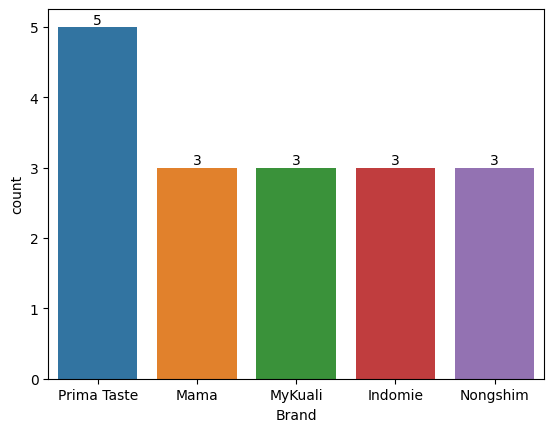

In [61]:
#Lets make a temp df that only includes entries that have placed
df_placed = df.loc[df['Placed'] ==  True]

#Determine the top 5 showing brands and make them their own data frames like before

#df_placed.Brand.value_counts()
df_1 = df_placed.loc[df_placed["Brand"] == "Prima Taste"]
df_2 = df_placed.loc[df_placed["Brand"] == "Mama"]
df_3 = df_placed.loc[df_placed["Brand"] == "MyKuali"]
df_4 = df_placed.loc[df_placed["Brand"] == "Indomie"]
df_5 = df_placed.loc[df_placed["Brand"] == "Nongshim"]

df_top_brands = pd.concat([df_1, df_2, df_3, df_4, df_5])

countplot = sns.countplot(x='Brand', data=df_top_brands)
countplot.bar_label(container=countplot.containers[0], labels=df_top_brands.Brand.value_counts())


We can very clearly see which instant ramen brands have the best showing in the top ten rankings of each year.

This question proved to be more difficult than expected and threw me some curveballs such as the top ten ratings not being what I expected and the countplot not being quite as straight forwards as the previous.

# What Brands Average the highest stars?

In [62]:
#Begin by creating a new df that only contains 'Brand' and 'Stars'. I had to use this method because of an error involving df_av being a series rather than a df.
df_av = pd.DataFrame([df.Brand, df.Stars]).transpose() 

#Had to convert from object to float. 'coerce' is added because there were a few 'Unrated' values that needed to be ignored in order to function properly.
#This doesn't make the data lose value however because if the ramen hadn't been rated then it added nothing to the average.
df_av['Stars'] = pd.to_numeric(df_av.Stars, errors='coerce') 

#This line groups the brands together and calculates each brand's star average
#df_av = df_av.groupby('Brand', as_index=False).Stars.mean()
#print(df_av.sort_values(by='Stars', ascending=False))

#I didn't take into consideration that some brands only had 1 ramen rated so it skews the results a tad. Lets try this again.

#This line creates a new column in df_av that keeps track of the amount of entries that each brand has, that way I can filter out brands with only 1 or 2 ramens.
df_av['Entries'] = df_av.groupby(['Brand'])['Stars'].transform('count')
#now we filter out the more heavily skewed brands
df_av = df_av[df_av.Entries > 20]
#and group and sort!
df_av = df_av.groupby('Brand', as_index=False).Stars.mean()
print(df_av.sort_values(by='Stars', ascending=False))




               Brand     Stars
11           MyKuali  4.947917
3               KOKA  4.210000
17     Samyang Foods  4.068627
0   A-Sha Dry Noodle  4.067308
1            Indomie  4.034314
16             Paldo  4.015385
14          Nongshim  4.002577
8              Mamee  3.939655
13            Nissin  3.918570
2                JML  3.902174
5               MAMA  3.898148
10       Master Kong  3.848214
18   Sapporo Ichiban  3.830000
12             Myojo  3.801587
6              Maggi  3.680000
7               Mama  3.628873
9           Maruchan  3.554276
21      Vina Acecook  3.536765
15            Ottogi  3.394444
4          Lucky Me!  3.294118
19           Ve Wong  3.141667
20             Vifon  3.054545
22           Wai Wai  2.934000


That took a bit more work and manipulation to get the data I was looking for, however with some determination and research I got there.

Now lets visualize it! Yeehaw!

<Axes: xlabel='Brand', ylabel='Stars'>

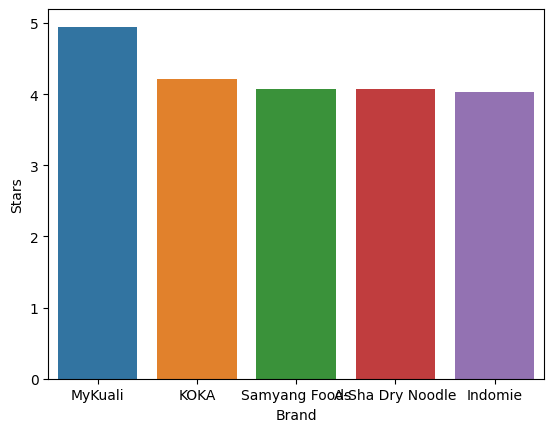

In [63]:
sns.barplot(data=df_av,x="Brand", y='Stars', order=['MyKuali','KOKA', 'Samyang Foods', 'A-Sha Dry Noodle','Indomie'])

# Conclusions

Throughout this data analysis case study I learned a handful of useful insights about this dataset.

    The top 3 instant ramen producing companies are Japan, USA, and South Korea.

    The most popular packaging styles are Pack by a wide margin followed by Bowl then Cup.

    The top 5 brands in regards to 'Top 10 Placements' is Prima Taste, Mama, Mykuali Brand, Indomie, and Nongshim.

    The top 5 brands in reference to user star ratings is MyKuali, KOKA, Samyang Foods, A-sha Dry Noodle, and Indomie.

    The combination of the previous two insights shows that MyKuali, Nongshim, and Indomie have particularly strong showings in both categories.

    

